## K-Means Clustering

In [8]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [9]:
# import the dataset
# selecting AI and SS so visualisation is possible 
# in a 2D format
dataset = pd.read_csv("Mall_Customers.csv")
x = dataset.iloc[:, [3,4]].values

In [10]:
# use the "elbow method" to find the optimal number of clusters
# first instance using up to 10 clusters
from sklearn.cluster import KMeans

wcss = []
for i in range(1, 11):
  kmeans = KMeans(n_clusters = i, init="k-means++", random_state = 42)
  kmeans.fit(x)
  wcss.append(kmeans.inertia_)

Text(0, 0.5, 'Within-Cluster Sum of Square (WCSS)')

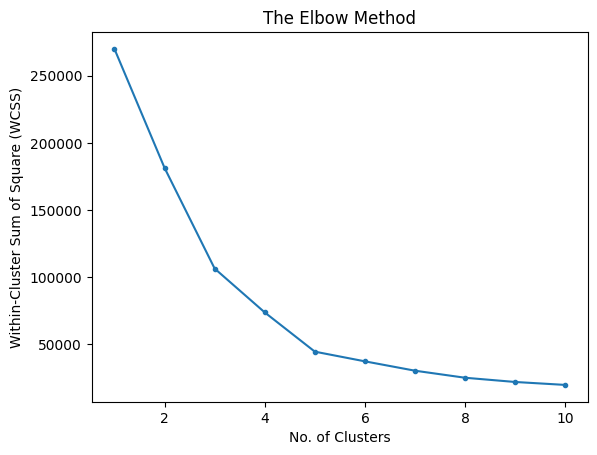

In [11]:
# plot the chart
plt.plot(range(1,11), wcss, marker=".")
plt.title("The Elbow Method")
plt.xlabel("No. of Clusters")
plt.ylabel("Within-Cluster Sum of Square (WCSS)")

In [12]:
# Train the K-Means Model on the dataset
# same code from the for loop but with the optimal cluster count
kmeans = KMeans(n_clusters = 5, init="k-means++", random_state = 42)
y_kmeans = kmeans.fit_predict(x)
print(y_kmeans)

[2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2
 3 2 3 2 3 2 0 2 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 4 1 4 0 4 1 4 1 4 0 4 1 4 1 4 1 4 1 4 0 4 1 4 1 4
 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1
 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4]


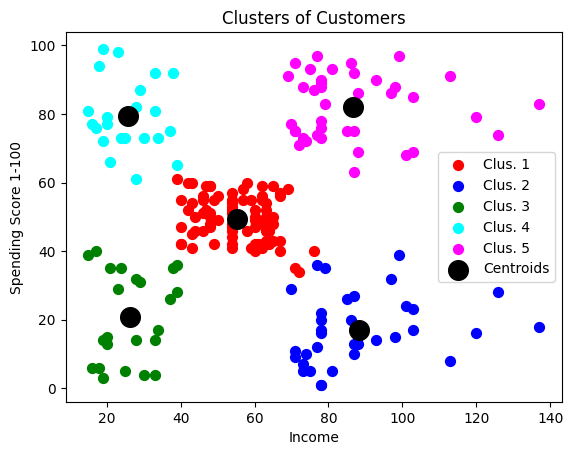

In [15]:
# visualise the clusters
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 50, c = "red", label="Clus. 1")
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 50, c = "blue", label="Clus. 2") 
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 50, c = "green", label="Clus. 3") 
plt.scatter(x[y_kmeans == 3, 0], x[y_kmeans == 3, 1], s = 50, c = "cyan", label="Clus. 4")
plt.scatter(x[y_kmeans == 4, 0], x[y_kmeans == 4, 1], s = 50, c = "magenta", label="Clus. 5")

# 0 = x centroid
# 1 = y centroid
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 200, c = "black", label ="Centroids")
plt.title("Clusters of Customers")
plt.xlabel("Income")
plt.ylabel("Spending Score 1-100")
plt.legend()
plt.show()